<a href="https://colab.research.google.com/github/ashfaqfardin/Numerical-Method-Assignments/blob/main/1930087_Lab_4_Section_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, we be implementing the trapezoidal rule and Simpson's rule for numerical integration.

#### **Import necessary packages**

In [1]:
# Write appropriate code
import numpy as np
from matplotlib import pyplot as plt

#### **A. The Trapezoidal Rule**

The trapezoidal rule is a numerical method for approximating the definite integral of a function $f(x)$ over the interval $[a,b]$. 

$$I = \int_a^b f(x) dx$$

Using the first order Taylor series expansion of $f(x)$ we can approximate the integral as:

$$
\begin{align*}
I &\approx \int_a^b f_T(x) dx \\
&\approx \int_a^b \left[ f(a) + \frac{f(b)-f(a)}{b-a} (x-a) \right] dx \\
&\approx (b-a) \left[ \frac{f(a)+f(b)}{2} \right]
\end{align*}
$$

where $f_T(x) = f(a) + \frac{f(b)-f(a)}{b-a} (x-a)$ is the first order Taylor series expansion of $f(x)$ at $x=a$.

The trapezoidal rule is equivalent to approximating the area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$.

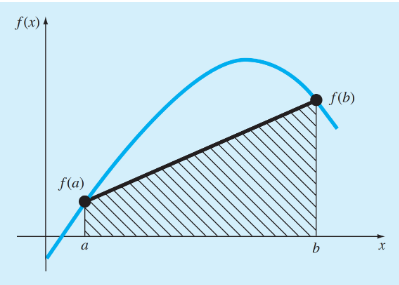





We will now implement the trapezoidal rule to approximate the integral of $f(x) = -\frac{1}{5}(x-4)^2 + 8$ over the interval $[-1, 8]$ by following the steps below:

##### **Step 1: Define the function**
Write a function that takes x as an input and returns the value of $f(x)$. Note that the function should be able to handle both scalar and vector inputs.

In [2]:
# Write appropriate code
def f(x):
  return -1/5 * (x-4)**2 +8

##### **Step 2: Define the interval**
Define the interval as a list of two elements, where the first element is the lower bound and the second element is the upper bound. Name the list `interval`.

In [3]:
# Write appropriate code
interval = np.array([-1, 8])

##### **Step 3: Plot the graph of the function**
In order to visualize the function, and the area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$, we will plot the following:

* The function $f(x)$ over the interval $[-5, 12]$.
* The straight line connecting the points $(a,f(a))$ and $(b,f(b))$
* The filled area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$.

To plot the filled area under the straight line connecting the points $(a,f(a))$ and $(b,f(b))$, we will use the `fill_between` function from the `matplotlib.pyplot` package. See the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) for more information.



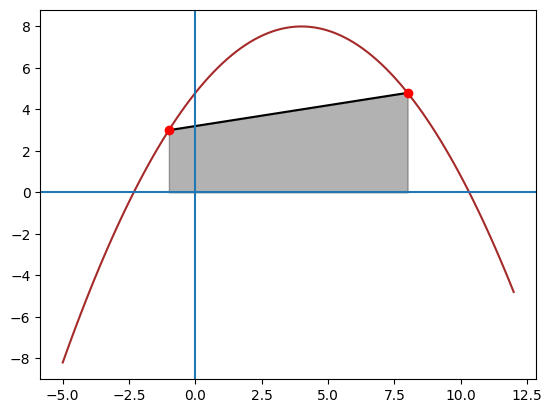

In [4]:
# Write appropriate code
x = np.linspace(-5, 12, 100)
y = f(x)
plt.plot(x, y, "brown")
a = interval[0]
b = interval[1]
plt.plot(interval, f(interval), "k")
plt.plot(a, f(a), "ro")
plt.plot(b, f(b), "ro")
plt.axhline(y=0)
plt.axvline(x=0)
plt.fill_between(interval, f(interval), color='k', alpha=0.3)
plt.show()

##### **Step 4: Define a function to compute the trapezoidal rule**
Write a function named `trapezoidal` that takes the `interval` and `f` as parameters and returns the approximate value of the integral. You have to call the function `f` that you defined in Step 1 to compute the value of $f(a)$ and $f(b)$ and then use the trapezoidal rule to compute the approximate value of the integral. Finally, return the approximate value of the integral.

In [5]:
# Write appropriate code
def trapezoidal(interval, f):
  a = interval[0]
  b = interval[1]
  return (b-a) * (f(b) + f(a))/2

##### **Step 5: Compute the approximate value of the integral**
Call the function `trapezoidal` that you defined in Step 4 and pass the interval as parameters. Store the returned value in a variable named `I`. Print the value of `I`. Calculate the integral analytically and compare the result with the approximate value of the integral. Print the approximate relative error.

In [6]:
# Write appropriate code
I = trapezoidal(interval, f)
I_actual = 59.4

error = (I_actual - I)/I_actual * 100
print(f"Error: {error:.2f}%")

Error: 40.91%


#### **B. The Composite Trapezoidal Rule**

The composite trapezoidal rule is a numerical method for approximating the definite integral of a function $f(x)$ over the interval $[a,b]$ using a partition of the interval into $n$ subintervals of equal length. Using the composite trapezoidal rule, we can reduce the error in the approximation of the integral by increasing the number of subintervals. 

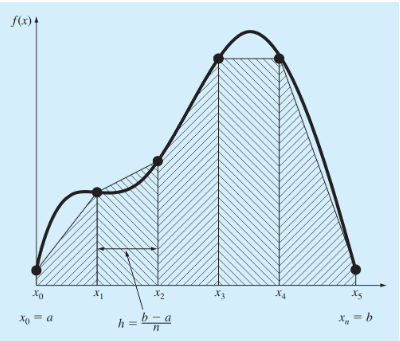

In the composite trapezoidal rule, we approximate the integral in each subinterval using the trapezoidal rule and then sum the approximations to obtain the approximate value of the integral.

$$
\begin{align*}
I &= \int_a^b f(x) dx \\
I &= \int_{x_0}^{x_1} f(x) dx + \int_{x_1}^{x_2} f(x) dx + \cdots + \int_{x_{n-1}}^{x_n} f(x) dx \\
I &\approx h \frac{f(x_0) + f(x_1)}{2} + h \frac{f(x_1) + f(x_2)}{2} + \cdots + h \frac{f(x_{n-1}) + f(x_n)}{2} \\
&= \frac{h}{2} \left[ f(x_0) + 2f(x_1) + 2f(x_2) + \cdots + 2f(x_{n-1}) + f(x_n) \right] \\
&= \frac{h}{2} \left[ f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n) \right] \\
&= (b-a) \frac{f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n)}{2n}
\end{align*}
$$

where $h = \frac{b-a}{n}$ is the length of each subinterval.

We will now implement the composite trapezoidal rule to approximate the integral of $f(x) = -\frac{1}{5}(x-4)^2 + 8$ over the interval $[-1, 8]$ by following the steps below:

##### **Step 1: Define the function**
Write a function that takes x as an parameter and returns the value of $f(x)$. Note that the function should be able to handle both scalar and vector inputs.

In [7]:
# Write appropriate code
# already defined

##### **Step 2: Define the interval**
Define the interval as a numpy array of two elements, where the first element is the lower bound and the second element is the upper bound. Name the array `interval`.

In [8]:
# Write appropriate code
# already defined

##### **Step 3: Define a function to compute the composite trapezoidal rule**
Write a function named `composite_trapezoidal` that takes the interval and the number of subintervals as parameters and returns the approximate value of the integral. 
*   Take `n+1` equally spaced points between the lower and upper bounds of the interval. Name the array `x`.
*   Compute the value of $f(x)$ at each point in `x`. Name the array `y`.
*   Compute the approximate value of the integral using the composite trapezoidal rule. Name the variable `I`.
*   Return the approximate value of the integral.

In [13]:
# Write appropriate code
def composite_trapezoidal(interval, n):
    a, b = interval
    h = (b-a)/n
    x = np.linspace(a, b, n+1)
    y = f(x)
    I = (h/2) * (y[0] + 2*np.sum(y[1:n]) + y[n])
    return I

##### **Step 4: Compute the approximate value of the integral**
Call the function `composite_trapezoidal` that you defined in Step 3 and pass the interval and the number of subintervals as parameters. We will take different values of `n` and compare the results. 

*   Call the function `composite_trapezoidal` and pass the interval and `n=1` as parameters. Store the returned value in a variable named `I1`. Print the value of `I1`.
*   Call the function `composite_trapezoidal` and pass the interval and `n=2` as parameters. Store the returned value in a variable named `I2`. Print the value of `I2`.
*   Call the function `composite_trapezoidal` and pass the interval and `n=4` as parameters. Store the returned value in a variable named `I4`. Print the value of `I4`.
*   Call the function `composite_trapezoidal` and pass the interval and `n=8` as parameters. Store the returned value in a variable named `I8`. Print the value of `I8`.

Calculate the integral analytically and compare the result with the approximate value of the integral. Print the approximate relative error for each value of `n`.

In [14]:
# Write appropriate code
I1 = composite_trapezoidal(interval, 1)
I2 = composite_trapezoidal(interval, 2)
I4 = composite_trapezoidal(interval, 4)
I8 = composite_trapezoidal(interval, 8)
print(I1,I2,I4,I8)

#I actual value 59.4 -- already defined

error1 = (I_actual - I1)/I_actual * 100
print(f"Error for n=1: {error1:.2f}%")
error2 = (I_actual - I2)/I_actual * 100
print(f"Error for n=2: {error2:.2f}%")
error4 = (I_actual - I4)/I_actual * 100
print(f"Error for n=4: {error4:.2f}%")
error8 = (I_actual - I8)/I_actual * 100
print(f"Error for n=8: {error8:.2f}%")

35.1 53.324999999999996 57.881249999999994 59.020312499999996
Error for n=1: 40.91%
Error for n=2: 10.23%
Error for n=4: 2.56%
Error for n=8: 0.64%


##### **Step 5: Plot the graph of the function**
In order to visualize the function, and the area under the straight line connecting the subintervals we plot the following:

* The function $f(x)$ over the interval $[-5, 12]$.
* Take `4` equally spaced points between the lower and upper bounds of the interval. Plot the straight line connecting the points $(a,f(a))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, $(b,f(b))$.
* Plot the filled area under the straight line connecting the points $(a,f(a))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, $(b,f(b))$.

To plot the filled area under the straight line connecting the points $(a,f(a))$, $(x_1,f(x_1))$, $(x_2,f(x_2))$, $(b,f(b))$, we will use the `fill_between` function from the `matplotlib.pyplot` package. See the documentation [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.fill_between.html) for more information.

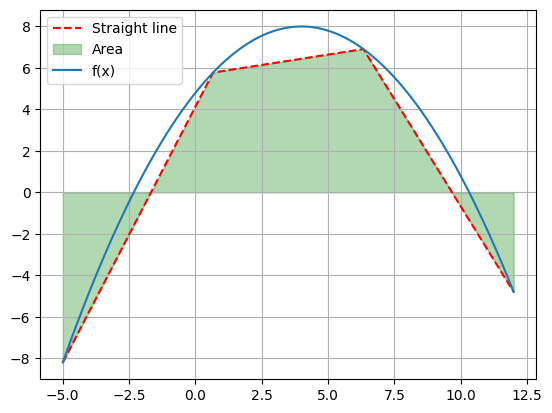

In [27]:
a, b = -5, 12
x = np.linspace(a, b, 4)
y = f(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r--', label='Straight line')
ax.fill_between(x, y, color='g', alpha=0.3, label='Area')
ax.plot(np.linspace(a, b, 1000), f(np.linspace(a, b, 1000)), label='f(x)')
ax.legend()
plt.grid()